In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from tensorflow.keras import Sequential

In [9]:
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Input

In [10]:
df = pd.read_csv("../../../dados/nlp/news_sentiment_analysis.csv", encoding="utf-8")
df

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business
...,...,...,...,...,...,...,...,...
3495,etfdailynews,MarketBeat News,"Arrow Electronics, Inc. (NYSE:ARW) Shares Purc...",QRG Capital Management Inc. increased its stak...,https://www.etfdailynews.com/2024/07/18/arrow-...,2024-07-18T14:36:45+00:00,positive,Technology
3496,etfdailynews,MarketBeat News,"3,120 Shares in NICE Ltd. (NASDAQ:NICE) Bought...",QRG Capital Management Inc. bought a new posit...,https://www.etfdailynews.com/2024/07/18/3120-s...,2024-07-18T14:36:44+00:00,positive,Technology
3497,etfdailynews,MarketBeat News,"QRG Capital Management Inc. Has $857,000 Stock...",QRG Capital Management Inc. boosted its stake ...,https://www.etfdailynews.com/2024/07/18/qrg-ca...,2024-07-18T14:36:43+00:00,positive,Technology
3498,finanznachrichten,NaN,Biotechnology Market: Surging Investments and ...,"WESTFORD, Mass., July 18, 2024 /PRNewswire/ --...",https://www.finanznachrichten.de/nachrichten-2...,2024-07-18T14:36:00+00:00,neutral,Technology


In [11]:
news_df = df[ ["Description", "Type"] ]
# news_df

In [12]:
tokenizer = Tokenizer( num_words = 1000 )

In [13]:
tokenizer.fit_on_texts( news_df["Description"] )

In [14]:
sequences = tokenizer.texts_to_sequences( news_df["Description"] )

In [15]:
# sequences

In [16]:
# tokenizer.word_index

In [17]:
max_palavras = 0
for sequence in sequences:
    if len(sequence) > max_palavras:
        max_palavras = len(sequence)
max_palavras        

80

In [18]:
sequences_padded = pad_sequences( sequences, padding="post" )
X = sequences_padded
X

array([[598, 117,   5, ...,   0,   0,   0],
       [211, 373, 212, ...,   0,   0,   0],
       [ 28,  22,  26, ...,   0,   0,   0],
       ...,
       [216, 231,  36, ...,   0,   0,   0],
       [933,  31,  96, ...,   0,   0,   0],
       [216, 231,  36, ...,   0,   0,   0]])

In [19]:
news_df["Type"].unique()

array(['Business', 'Entertainment', 'General', 'Health', 'Science',
       'Sports', 'Technology'], dtype=object)

Business =>  [0, 0, 0, 1] 
Technology => [0, 0, 1, 0]
Processamento => [ 0.002, 0.004, 0.9987, 0.002]

['Business' ==> [1, 0, 0, 0, 0, 0, 0], 
 'Entertainment' ==> [0, 1, 0, 0, 0, 0, 0], 
 'General' ==> [0, 0, 1, 0, 0, 0, 0], 
 'Health' ==> [0, 0, 0, 1, 0, 0, 0], 
 'Science' ==> [0, 0, 0, 0, 1, 0, 0], 
 'Sports' ==> [0, 0, 0, 0, 0, 1, 0], 
 'Technology' ==> [0, 0, 0, 0, 0, 0, 1]]

saida -> [0.5, 0.4, 0.2, 0.1, 0.8, 0.9, 0.6]
saida calculada -> [0, 0, 0, 0, 0, 1, 0]
saida esperada -> [0, 0, 0, 0, 0, 0, 1]
erro -> [0, 0, 0, 0, 0, 1, -1]
ajusta os pesos 

In [23]:
label_encoder = LabelEncoder()

In [24]:
class_encoded = label_encoder.fit_transform( news_df["Type"] )
class_encoded.shape

(3500,)

In [25]:
class_encoded

array([0, 0, 0, ..., 6, 6, 6])

In [26]:
# [[0], [0], [0], ..., [6], [6], [6]]
class_encoded_2d = class_encoded.reshape( class_encoded.shape[0], 1 )

In [27]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [28]:
Y = one_hot_encoder.fit_transform( class_encoded_2d )
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [29]:
Y.shape

(3500, 7)

In [30]:
modelo = Sequential()

# modelo.add( Input( [max_palavras] ) )
modelo.add( Embedding( input_dim=1000, output_dim=128 ))
modelo.add( GlobalAveragePooling1D() )
modelo.add( Dense( 128, activation="relu") )
modelo.add( Dense( 7, activation="softmax") )
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
modelo.compile( optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=150)

In [33]:
history_fit = modelo.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2103 - loss: 1.9335
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4120 - loss: 1.7266
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5632 - loss: 1.3348
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6612 - loss: 1.0455
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8393 - loss: 0.6658
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8967 - loss: 0.4676
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9017 - loss: 0.3750
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9066 - loss: 0.3275
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9311 - loss: 0.2577
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9269 - loss: 0.2411
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9365 - loss: 0.2043
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9289 - lo

In [34]:
history_fit.history

{'accuracy': [0.2826666533946991,
  0.4540952444076538,
  0.6190476417541504,
  0.7379047870635986,
  0.8468571305274963,
  0.8929523825645447,
  0.9005714058876038,
  0.909333348274231,
  0.9299047589302063,
  0.9295238256454468,
  0.9359999895095825,
  0.936380922794342,
  0.9420952200889587,
  0.9440000057220459,
  0.9504761695861816,
  0.9417142868041992,
  0.9413333535194397,
  0.9474285840988159,
  0.9554286003112793,
  0.9485714435577393],
 'loss': [1.9112824201583862,
  1.637694001197815,
  1.2225159406661987,
  0.9060330986976624,
  0.6144959330558777,
  0.4524786174297333,
  0.36819806694984436,
  0.31515514850616455,
  0.251272588968277,
  0.22702708840370178,
  0.20183491706848145,
  0.18482491374015808,
  0.17116688191890717,
  0.15336228907108307,
  0.1456790715456009,
  0.1528877466917038,
  0.13809625804424286,
  0.13216692209243774,
  0.11816693097352982,
  0.12460453063249588]}

In [35]:
import matplotlib.pyplot as plt

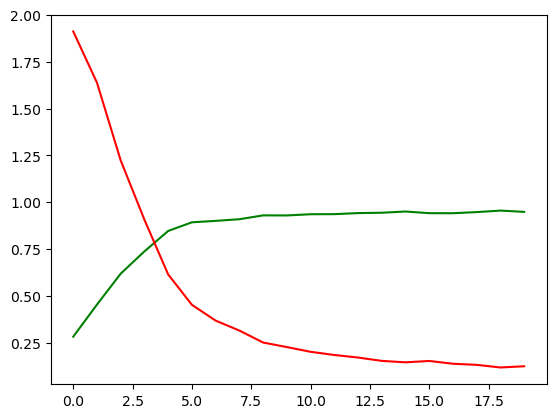

In [36]:
plt.plot(history_fit.history["accuracy"], color="green")
plt.plot(history_fit.history["loss"], color="red")
plt.show()

In [37]:
modelo.evaluate(X_test, Y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8749 - loss: 0.4020


[0.43219321966171265, 0.868571400642395]

In [38]:
texto = "IBM sell stock options"
texto_em_sequencias = np.array(tokenizer.texts_to_sequences( [texto] ))
sequencias_padded = pad_sequences( texto_em_sequencias, maxlen=max_palavras, padding="post" )
sequencias_padded
modelo.predict([sequencias_padded])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


C:\Users\anton\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 80))',)
  warnings.warn(msg)


array([[0.05578408, 0.2639351 , 0.04675204, 0.05275631, 0.2085945 ,
        0.02731708, 0.34486088]], dtype=float32)